<a href="https://colab.research.google.com/github/adityayadav4507/20-Days-of-stats-prob/blob/main/3_Day_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import numpy as np
import random


In [135]:
# throw a dice 1000 times
l=[]
for i in range(1000):
   a=random.randint(1,6)
   l.append(a)

In [136]:
s=pd.Series(l).value_counts()/(len(l))

In [137]:
s.sort_index()

,count
1,0.144
2,0.158
3,0.154
4,0.192
5,0.187
6,0.165


<Axes: >

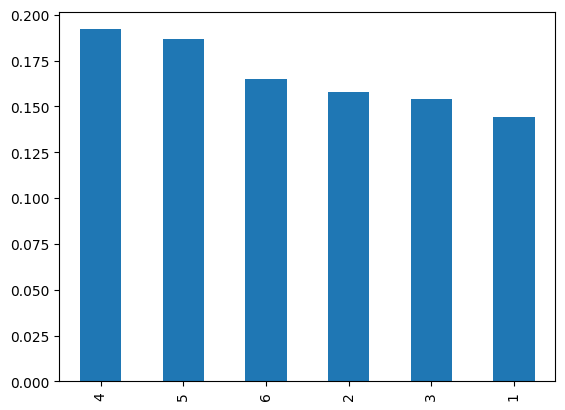

In [138]:
import matplotlib.pyplot as plt
s.plot(kind='bar')

In [139]:
# CDF
np.cumsum(s.sort_index())

,count
1,0.144
2,0.302
3,0.456
4,0.648
5,0.835
6,1.000


<Axes: >

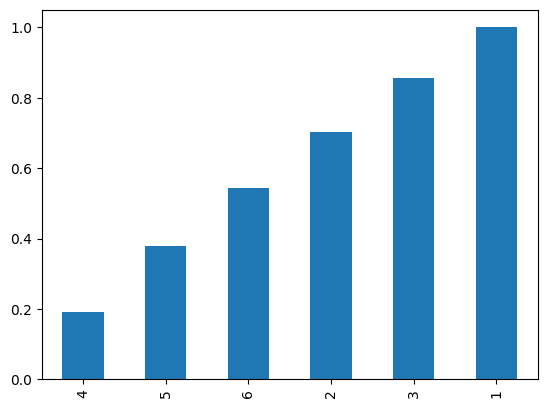

In [140]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [141]:
from numpy.random import normal

sample=normal(loc=50,scale=5,size=1000)
sample=sample+110
sample

array([154.00506448, 156.23216212, 152.00873271, 158.41769684,
       164.96313645, 156.60763897, 152.61382768, 154.26175129,
       161.77118881, 155.62690565, 156.15864813, 162.32412759,
       152.91725237, 164.27811348, 164.41811704, 164.08005355,
       163.36418666, 159.80590596, 166.8344967 , 161.86026706,
       157.67409651, 160.63854721, 165.48999634, 162.2011973 ,
       157.63806676, 153.41186509, 153.99046975, 165.98682907,
       156.32919082, 155.47280508, 159.79701404, 167.68501305,
       168.2897758 , 160.08362304, 161.98252446, 163.22567067,
       172.86208032, 159.92935907, 158.51798386, 161.9525427 ,
       157.07682213, 163.99020379, 155.91070915, 168.79861295,
       164.07109096, 155.46921795, 163.7794443 , 168.58985699,
       167.49889139, 165.7330211 , 160.55833432, 162.96171191,
       159.84319032, 158.78909739, 168.06801277, 161.76017725,
       173.98626369, 158.41284198, 159.3838292 , 149.90570413,
       161.0186175 , 171.36620164, 165.75542947, 163.86

(array([  8.,  12.,  26.,  36.,  48.,  89., 106., 110., 109., 106., 100.,
         96.,  58.,  38.,  21.,  20.,   8.,   4.,   3.,   2.]),
 array([146.51905117, 148.03836975, 149.55768833, 151.07700691,
        152.59632549, 154.11564407, 155.63496265, 157.15428123,
        158.67359981, 160.19291839, 161.71223697, 163.23155555,
        164.75087413, 166.27019271, 167.78951129, 169.30882987,
        170.82814845, 172.34746704, 173.86678562, 175.3861042 ,
        176.90542278]),
 <BarContainer object of 20 artists>)

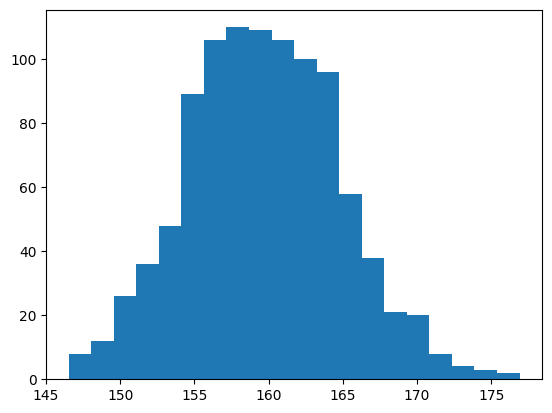

In [142]:
plt.hist(sample,bins=20) # look like normal distribution

In [143]:
# calculate mean and std

sample_mean=sample.mean()
sample_std=sample.std()

In [144]:
# fit the distribution with above parameters

from scipy.stats import norm
dist=norm(sample_mean,sample_std) # it create normal dist with these hyperparameters


In [145]:
# generate 100 data points between the min and max

values=np.linspace(sample.min(),sample.max(),100)

In [146]:
probabilities_density =[dist.pdf(value) for value in values]

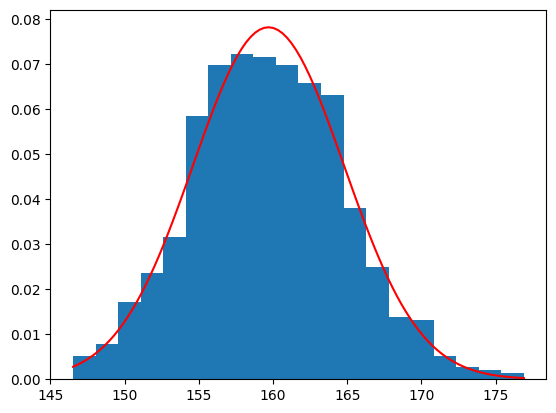

In [147]:
# plot hist and pdf
plt.hist(sample,bins=20,density=True)
plt.plot(values,probabilities_density,'red')

/tmp/ipython-input-1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

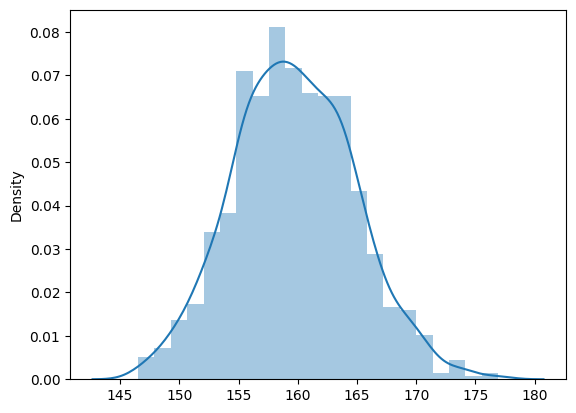

In [148]:
import seaborn as sns
sns.distplot(sample)

# non parametric dist function

# KDE

In [149]:
# generate points
sample1=normal(loc=20,scale=5,size=300)
sample2=normal(loc=40,scale=5,size=700)
sample=np.hstack((sample1,sample2))

In [150]:
sample

array([ 5.43128407, 14.42467415, 20.43080514, 20.85734177, 22.04103838,
       17.13682129, 20.65743243, 11.1431539 , 20.36858768, 23.56834605,
       18.76271024, 27.31738944, 25.50890286, 16.77727086, 23.99901573,
       24.799526  , 21.06806815, 22.50044384, 22.07266936, 17.27635955,
       22.92586074, 24.96576554, 16.68090105, 19.9857014 , 16.20348764,
        5.51746219,  9.35641117, 21.70497316, 19.93308827, 15.50590157,
       21.88812597, 26.8610754 , 27.81279798, 17.10813918, 20.20434733,
       12.9124868 , 24.07105021, 24.29744008, 20.18477107, 29.99169827,
       24.90658645, 13.58067462, 21.74423365, 18.749713  , 18.09901251,
       20.22195105, 21.1625781 , 19.97881365, 20.4888595 , 20.56535703,
       15.74429254, 20.56010948, 29.31878489, 15.52607555, 15.50636261,
       15.5111007 , 22.58802798, 30.02057664, 18.85093304, 19.51203045,
       11.54641805, 28.27815392, 23.81738348, 18.05967513, 19.20963772,
       24.00065968,  8.43815245, 35.28001291, 22.60173439, 26.99

(array([  5.,   5.,  14.,  36.,  39.,  50.,  57.,  44.,  34.,  25.,  27.,
         56.,  89., 139., 118., 126.,  83.,  29.,  16.,   8.]),
 array([ 5.43128407,  7.86124311, 10.29120216, 12.7211612 , 15.15112025,
        17.58107929, 20.01103833, 22.44099738, 24.87095642, 27.30091546,
        29.73087451, 32.16083355, 34.59079259, 37.02075164, 39.45071068,
        41.88066973, 44.31062877, 46.74058781, 49.17054686, 51.6005059 ,
        54.03046494]),
 <BarContainer object of 20 artists>)

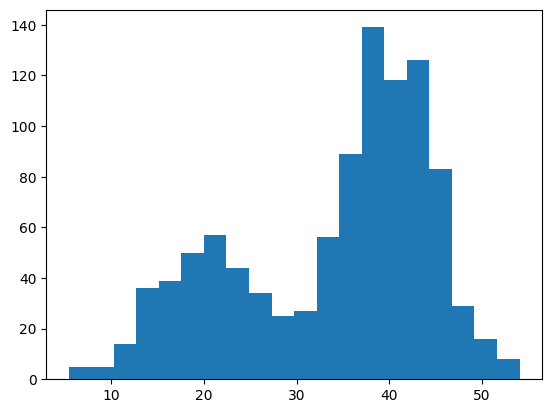

In [151]:
plt.hist(sample,bins=20)

In [152]:
from sklearn.neighbors import KernelDensity

model=KernelDensity(kernel='gaussian',bandwidth=3)
model.fit(sample.reshape(-1,1))

KernelDensity(bandwidth=3)

In [153]:
# generate 100 points
values= np.linspace(sample.min(),sample.max(),100)
values=values.reshape(-1,1)


In [154]:
probabilities_density= model.score_samples(values) #it give log of probability
probabilities_density=np.exp(probabilities_density)

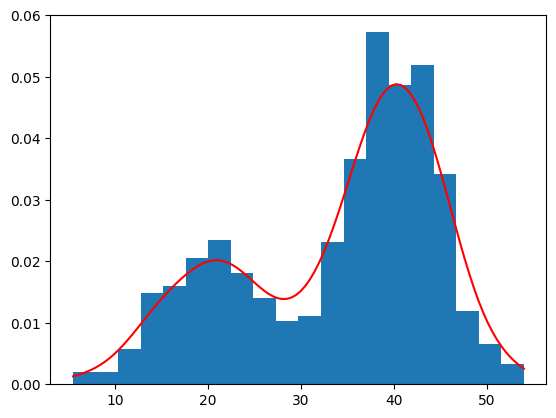

In [155]:
plt.hist(sample,bins=20,density=True)
plt.plot(values,probabilities_density,'red')

<Axes: ylabel='Density'>

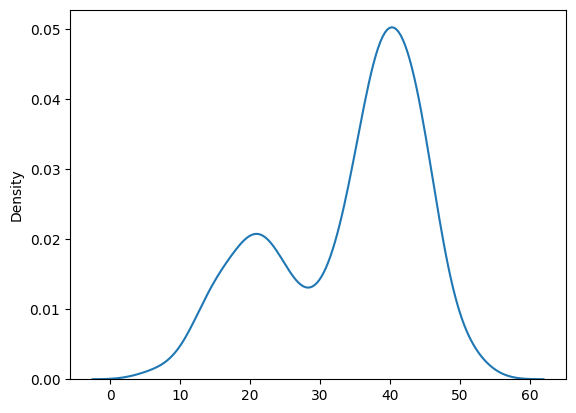

In [156]:
sns.kdeplot(sample)